## Training Linear Classifier

### Loss function im classification

Loss function - error rate

$L(a,x) = \frac{1}{N} \sum^N_{i=1}[a(x_i) \ne y_i]$

sometimes accuracy is measured:

$L(a,x) = \frac{1}{N} \sum^N_{i=1}[a(x_i) = y_i]$

Indicator function

$[A]=\begin{cases} 1, \text{if A is True} \\ 0, \text{if A is False} \end{cases}$

---

### Margin

Loss function

$L(w, X) = \frac{1}{N} \sum^{N}_{i=1}[sign(\langle w, x_i \rangle) \ne y_i]$

Alternative formulation 

$L(w, X) = \frac{1}{N} \sum^{N}_{i=1}[y_i\langle w, x_i \rangle < 0]$

Indicator - non-differentiable function (can't use gradient decent to train)

_for all values of margin that are smaller than 0, it is equal to 1, and for all values larger than 0, it is equal to 0._

### upper bound

- To train it, we found a function which __upper bound__ our error rate. And use it instead of the error rate loss to train our classifier.

- We minimize our upper bound

- Hopefully, it will automatically reduce the error rate

_examples_

- logistic, $\tilde{l}(M) = log(1 + e^{-M})$
- hinge loss, $\tilde{l}(M) = max(0, 1-M)$
- exponential, $\tilde{l}(M) = e^{-M}$
- sigmoid, $\tilde{l}(M) = \frac{2}{1+e^M}$

Assume we choose logstic function.

We can apply gradient descent to optimize our loss.

$\tilde{L}(w, X) = \frac{1}{N} \sum^{N}_{i=1} log(1+exp(-y_i\langle w,x_i \rangle)) -> min_w$

We can add regularization, just as we did with linear regression

$min_w \tilde{L}(w,X) + \lambda \|w\|^2$

## Quality Metrics in Classification

Accuracy could be bad for imbalanced data. 

__Confusion matirix__

|  | y=1 | y=-1 |
|--|--|--|
| a(x)=1 | TP | FP |
| a(x)=-1 | FN | TN |

__Precision:__

Can we trust a classifier, when it attributes an object to a positive class?

$precision(a, X) = \frac{TP}{TP +FP}$

__Recall__

Which porpoortion of objects from the positive class was the model able to detect?

$recall(a, X) = \frac{TP}{TP + FN}$

__$F_1$ score (harmonic mean)__

$\large F = \frac{2 \times precision \times recall}{precision + recall}$

__$F_{\beta}$ score__

$\large F = \frac{(1+\beta^2)\times precision \times recall}{\beta^2 \times precision + recall}$

$\beta = 0.5-$ precision that is more important

## Precision-Recall Curve

Classifier:

$a(x) = sign(b(x)-t) = 2[b(x) > t] - 1$

Linear classifier:

$a(x) = sign(\langle w, x\rangle-t) = 2[\langle w, x\rangle > t] - 1$

$\langle w, x\rangle$ assess the possiblity of the class +1

> We are training the linear classifier which Create a hyperplane by taking scalar product between the feature vector and the weight vector. The value of our scalar product is then compared to the threshold. And if this value is positive, we assign an object to a positive course. On the other hand, if this value is negative, we assign an object to an active class.  
>Sometimes the threshold is just fixed to be 0, but we can also tune the threshold to get better results.

__How to choose threshold__

trade-off between precision and recall, decrease threshold normally decrease FN, larger recall. increase threshold normally increase FP, larger precision.

__How to evaluate b(x)__

Using Precision-recall curve

PR-curve

X-axis is recall  
Y-axis is precision  
Each point, values of precision and recall for different thresholds

- Left point (0, 0)  
    the largest threshold,  
    no points in the positive class  
    (we don't assign any point to a positive class. Therefore, both precision recall such model will be zero.)
    
    
- Right point (1,r)
    r- proportion of objects in positive class (If instead we will assign all points to the positive class, Recall will be exactly one, while precision will be equal to the proportion of objects in the positive class. We can call this value r.)
    lowest threshold
    All points are predicted to be positive.
    
- Ideal classifier, goes through the point (1,1)

- AUC-PRC, area under PR-curve, the larger the area will be, the better our model.

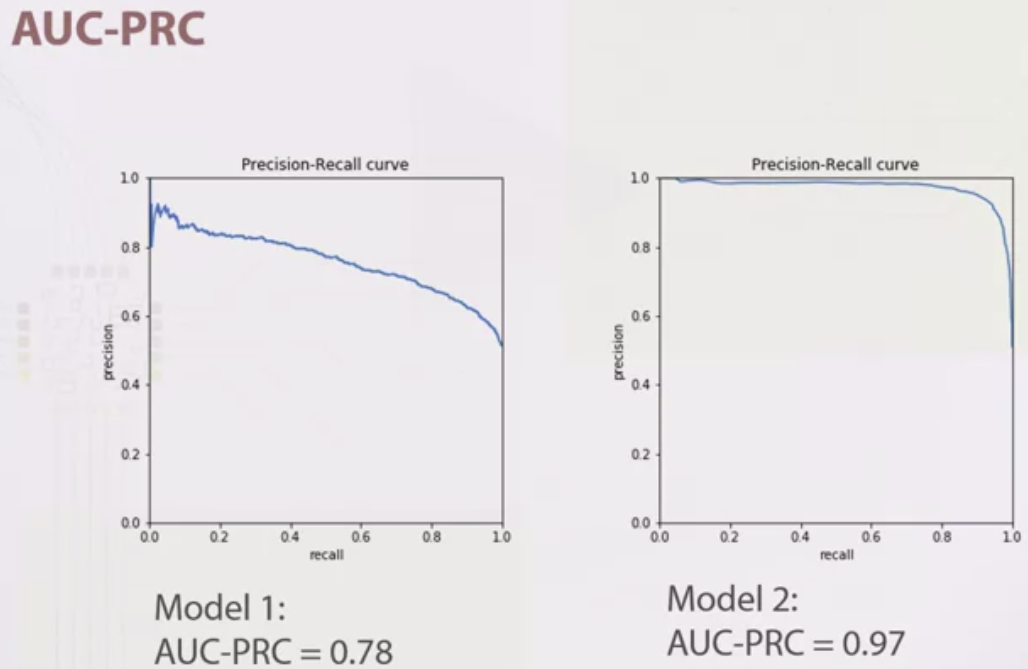

AUC-PRC measures how good the model arrange objects, threshold irrelavent.

__AUC-PRC__

- precision changes, dependeing on a class balance
- AUC-PRC of an ideal algorithm changes dependeing on the class balance
- Easier to interpret in case of dataset imbalance
- Better if we are interested in precision and recall

## Area Under ROC-Curve

- Receiving operating characteristic
- X-axis False positive rate

$FPR=\frac{FP}{FP+TN}$ (FP+TN, number of objects in class -1)

- y-axis True positive rate (recall)

$TPR=\frac{TP}{TP+FN}$ (TP+FN, number of objects in class +1)

- Left point (0,0)

- Right point (1,1)

- Idea classifier goes through (0,1)

- AUC-ROC area under ROC-curve

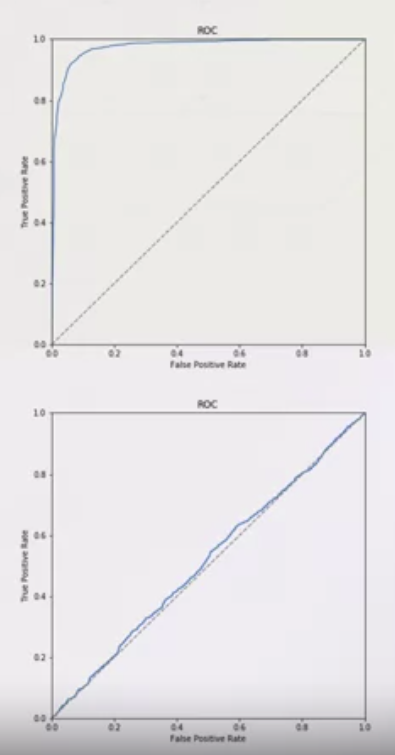

If the model is very bad, so that it randomly assigned classes to an object, then our ROC-curve will look like the one below It will coincide with a diagonal. Note that if your receiver operator characteristic curve goes below the diagonal, it means that you can flip your predictions and get a much nicer model.

- FPR and TPR are normalized to the class size
- AUC-ROC does not change if classes are imbalanced
- AUC-ROC of a ideal classifier is 1 (area is 1)

AUC-ROC is popular matrics used to estimate the ranging quality  
One have to be careful with AUC-ROC when classes are imbalanced